# LaTeX

In [1]:
from lets_plot import *


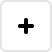
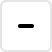
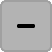
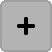
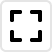
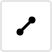
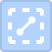
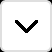
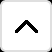
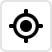
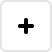
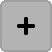
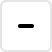
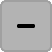
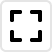
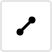
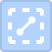
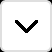
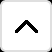
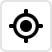

In [2]:
LetsPlot.setup_html()

In [3]:
formulas = [
    r"\(a\)",
    r"\(a \quad + \: 1\)",
    r"\( \alpha \cdot b + \gamma \)",
    r"\((a - b)(a + b)\)",
    r"\((a / (\Delta / c))\)",
    r"\(2^3\)",
    r"\(\Alpha + \alpha^{\Beta + \beta^{\Gamma + \gamma_{\Delta + \delta + \Delta} + \Gamma} + \Beta} + \Alpha\)",
    r"t\(^2\)",
    r"\((\eta + a^{d})(\eta - a^d)\)",
    r"\(a_2 x^2\)",
    r"\(\Alpha\Beta_{\gamma\delta}\Sigma^\infty\)",
    r"\((1 + (a^2 + 2))(b^{2\theta - 1} - (c^{-1} / \chi_i))\)",
    r"\(\frac{a}{b}\)",
    r"\(a + \frac{b}{c}\)",
    r"\(\frac{a}{b} + c\)",
    r"\(\frac{a}{b} + \frac{c}{d}\)",
    r"\(\frac{a + b}{d} + \frac{d}{e + f}\)",
    r"\(\frac{a}{b + c} + \frac{d + e}{f}\)",
    r"\(10^{1000} - \frac{\Alpha^\beta - \gamma_\Delta}{\Omega} - \frac{\omega}{\alpha_\Beta - \Gamma^\delta} - 1000^{10}\)",
    r"\(\alpha^\frac{a + b}{c} + \beta_{\frac{d}{e + f}}\)",
    r"\(A^{\frac{a^2}{b_1 + c_1} + \frac{d_1 + e_1}{f^2}} + \frac{B + C^2}{D^2 + E}\)",
    r"\(1^{2^{\frac{3^4 + 3}{3^4 + 3} + 3} + 2} + 1^{2^{\frac{3^4 + 3}{3^4 + 3} + 3} + 2}\)",
    r"ABC & \(a + \frac{b + c + d}{e} + f\) & DEF",
    r'<a href="https://github.com">GitHub</a> & \(a + \frac{b + c + d}{e} + f\) & <a href="https://github.com">GitHub</a>',
]
additional_formulas = [
    r"*Markdown* & \(a + \frac{b + c + d}{e} + f\) & *Markdown*",
    r"**Markdown** & \(a + \frac{b + c + d}{e} + f\) & **Markdown**",
    r"<span style='color:red'>Markdown</span> & \(a + \frac{b + c + d}{e} + f\) & <span style='color:red'>Markdown</span>",
    r"\(a + \frac{b + c + d}{e} + f\)" + '  \n' + r"\(a + \frac{b + c + d}{e} + f\)",
]

In [4]:
def formula_to_plot1(formula, n=None, hjust=None, nudge_x=None):
    p = ggplot() + \
        geom_hline(yintercept=0, color="white", tooltips='none') + \
        geom_vline(xintercept=0, color="white", tooltips='none') + \
        geom_text(x=0, label=formula, size=10, color="blue",
                  hjust=hjust, nudge_x=nudge_x) + \
        theme_void() + \
        theme(plot_background=element_rect(fill="#eeeeee", size=2),
              plot_title=element_markdown(size=10))
    if n is not None:
        latex = formula.replace(r"\(", "$").replace(r"\)", "$")
        p += ggtitle('**LaTeX #{0}:** "{1}"'.format(n, latex.replace("^", r"\^")))
    return p

def formula_to_plot2(formula, n=None, hjust=None, **args):
    caption = None
    if n is not None:
        latex = formula.replace(r"\(", "$").replace(r"\)", "$")
        caption = '**LaTeX #{0}:** "{1}"'.format(n, latex.replace("^", r"\^"))
    return ggplot() + \
        geom_point(x=0, color="rgba(0,0,0,0)", tooltips='none') + \
        theme_void() + \
        labs(title=formula, caption=caption) + \
        theme(plot_background=element_rect(fill="#eeeeee", size=2),
              plot_title=element_markdown(size=20, margin=[20, 0, 0, 0], hjust=hjust, color="blue"),
              plot_caption=element_markdown(hjust=0))

def formulas_plot(plot_function, formulas_list=formulas, hjust=None, nudge_x=None, width=1000, height=1500):
    return gggrid([
        plot_function(formula, n=i, hjust=hjust, nudge_x=nudge_x)
        for i, formula in enumerate(formulas_list)
    ], ncol=2) + ggsize(width, height)

### Centered `hjust`

In [5]:
formulas_plot(formula_to_plot1)

In [6]:
formulas_plot(formula_to_plot2, formulas_list=formulas + additional_formulas, height=2300, hjust=0.5)

### `hjust='left'`

In [7]:
formulas_plot(formula_to_plot1, hjust='left', nudge_x=-.5)

In [8]:
formulas_plot(formula_to_plot2, formulas_list=formulas + additional_formulas, height=2300, hjust=.1)

### `hjust='right'`

In [9]:
formulas_plot(formula_to_plot1, hjust='right', nudge_x=.5)

In [10]:
formulas_plot(formula_to_plot2, formulas_list=formulas + additional_formulas, height=2300, hjust=.6)

### All plot elements

In [11]:
# Take a look at the tooltips
test_formula = r"F: \( \Omega \cdot \frac{ 10 - a^{b_1} }{\sigma} \neq 0 \) (L)"
formula_data = {
    'x': [test_formula, test_formula],
    'g': [r"F1: \( \Sigma \cdot \frac{ 20 - a^{b_1} }{\rho} \geq 1 \)",
          r"F2: \( \Delta \cdot \frac{\xi}{ 30 - c_{d^2} } \leq -1 \)"],
}
ggplot(formula_data, aes(x="x")) + \
    geom_bar(aes(color="g"), y=1, stat='identity', fill="transparent", labels=layer_labels(['x'])) + \
    geom_label(aes(label="x", color="g"), y=2, tooltips=layer_tooltips(['x'])) + \
    scale_x_continuous('X: "{0}"'.format(test_formula)) + \
    scale_y_continuous('Y: "{0}"'.format(test_formula), limits=[0, 3]) + \
    scale_color_discrete(name=test_formula) + \
    facet_grid(x='g') + \
    labs(title='Title: "{0}"'.format(test_formula),
         subtitle='Subtitle: "{0}"'.format(test_formula),
         caption='Caption: "{0}"'.format(test_formula)) + \
    theme(legend_position='bottom') + \
    ggsize(1000, 600)

### Regressions

In [12]:
# Horizontal alignment
gggrid([
    formula_to_plot1(formulas[13], hjust='left'),
    formula_to_plot1(formulas[13], hjust='middle'),
    formula_to_plot1(formulas[13], hjust='right'),
])

In [13]:
# Mix LaTeX and plain text
gggrid([
    formula_to_plot1(r"AB-\(a + \frac{b + c}{d} + e\)-CD", hjust='left'),
    formula_to_plot1(r"AB-\(a + \frac{b + c}{d} + e\)-CD", hjust='middle'),
    formula_to_plot1(r"AB-\(a + \frac{b + c}{d} + e\)-CD", hjust='right'),
])

In [14]:
# LaTeX in title
gggrid([
    formula_to_plot2(formulas[13], hjust=.1),
    formula_to_plot2(formulas[13], hjust=.5),
    formula_to_plot2(formulas[13], hjust=.6),
])

In [15]:
# Wrong shift #1 (from B)
formula_to_plot1(formulas[20], hjust='left') + ggsize(600, 100)

In [16]:
# Wrong shift #2 (after \alpha)
formula_to_plot1(formulas[19], hjust='left') + ggsize(600, 100)

In [17]:
# Wrong shift #3 (after 1^2)
formula_to_plot1(formulas[21], hjust='left') + ggsize(600, 100)

In [18]:
# Wrong shift #4 (after "a+")
formula_to_plot1(formulas[22], hjust='left') + ggsize(600, 100)